My very first project in the field of data analysis.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [ ]:
from google.colab import files
uploades = files.upload()

Saving banknifty_data.csv to banknifty_data.csv


In [ ]:
bank = pd.read_csv("banknifty_data.csv")

In [ ]:
bank.describe()

,Unnamed: 0,open,high,low,close,weekday,range_HL,range_OC
count,5569.000000,5569.000000,5569.000000,5569.000000,5569.000000,5569.000000,5569.000000,5569.000000
mean,2784.000000,12631.966523,12736.926186,12509.049312,12623.553634,1.994613,227.876874,120.307194
std,1607.776156,10536.003150,10611.487337,10441.152216,10526.993520,1.413060,253.204788,170.791001
min,0.000000,743.700010,743.700010,743.700010,743.700010,0.000000,0.000000,0.000000
25%,1392.000000,3700.800000,3747.750000,3659.399900,3702.050000,1.000000,48.350100,1.599000
50%,2784.000000,10003.500000,10109.650000,9891.900400,9998.849600,2.000000,174.400000,64.551000
75%,4176.000000,19201.100000,19376.850000,19002.449000,19168.051000,3.000000,308.500000,166.100600
max,5568.000000,41234.551000,41829.602000,40829.148000,41238.301000,6.000000,4319.051000,2445.699000


In [ ]:
bank.head()

,Unnamed: 0,time,open,high,low,close,weekday,range_HL,range_OC,type
0,0,2000-01-03 09:15:00+05:30,1054.8101,1054.8101,1054.8101,1054.8101,0,0.0,0.0,Tie
1,1,2000-01-04 09:15:00+05:30,1092.0800,1092.0800,1092.0800,1092.0800,1,0.0,0.0,Tie
2,2,2000-01-05 09:15:00+05:30,1055.9900,1055.9900,1055.9900,1055.9900,2,0.0,0.0,Tie
3,3,2000-01-06 09:15:00+05:30,1086.6700,1086.6700,1086.6700,1086.6700,3,0.0,0.0,Tie
4,4,2000-01-07 09:15:00+05:30,1126.9900,1126.9900,1126.9900,1126.9900,4,0.0,0.0,Tie


In [ ]:
bank.tail()

,Unnamed: 0,time,open,high,low,close,weekday,range_HL,range_OC,type
5564,5564,2022-06-13 09:15:00+05:30,33728.648,33774.051,33210.352,33405.852,0,563.699,322.796,bear
5565,5565,2022-06-14 09:15:00+05:30,33180.602,33618.148,33123.898,33311.352,1,494.250,130.750,bull
5566,5566,2022-06-15 09:15:00+05:30,33317.801,33554.551,33249.551,33339.000,2,305.000,21.199,bull
5567,5567,2022-06-16 09:15:00+05:30,33648.801,33756.500,32537.949,32617.100,3,1218.551,1031.701,bear
5568,5568,2022-06-17 09:15:00+05:30,32393.449,32889.801,32290.551,32743.051,4,599.250,349.602,bull


In [ ]:
bank.dtypes

Unnamed: 0      int64
time           object
open          float64
high          float64
low           float64
close         float64
weekday         int64
range_HL      float64
range_OC      float64
type           object
dtype: object

In [ ]:
#time framing forthe bank_nifty
bank["time"]= pd.to_datetime(bank["time"])
bank["date"] = bank["time"].dt.date
bank["time"] = bank["time"].dt.time

In [ ]:
bank.head()

,Unnamed: 0,time,open,high,low,close,weekday,range_HL,range_OC,type,date
0,0,09:15:00,1054.8101,1054.8101,1054.8101,1054.8101,0,0.0,0.0,Tie,2000-01-03
1,1,09:15:00,1092.0800,1092.0800,1092.0800,1092.0800,1,0.0,0.0,Tie,2000-01-04
2,2,09:15:00,1055.9900,1055.9900,1055.9900,1055.9900,2,0.0,0.0,Tie,2000-01-05
3,3,09:15:00,1086.6700,1086.6700,1086.6700,1086.6700,3,0.0,0.0,Tie,2000-01-06
4,4,09:15:00,1126.9900,1126.9900,1126.9900,1126.9900,4,0.0,0.0,Tie,2000-01-07


In [ ]:
bank = bank[["date","time","open","high","low","close","range_HL", "range_OC","weekday","type"]]

bank.head()

,date,time,open,high,low,close,range_HL,range_OC,weekday,type
0,2000-01-03,09:15:00,1054.8101,1054.8101,1054.8101,1054.8101,0.0,0.0,0,Tie
1,2000-01-04,09:15:00,1092.0800,1092.0800,1092.0800,1092.0800,0.0,0.0,1,Tie
2,2000-01-05,09:15:00,1055.9900,1055.9900,1055.9900,1055.9900,0.0,0.0,2,Tie
3,2000-01-06,09:15:00,1086.6700,1086.6700,1086.6700,1086.6700,0.0,0.0,3,Tie
4,2000-01-07,09:15:00,1126.9900,1126.9900,1126.9900,1126.9900,0.0,0.0,4,Tie


In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5569 entries, 0 to 5568
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      5569 non-null   object 
 1   time      5569 non-null   object 
 2   open      5569 non-null   float64
 3   high      5569 non-null   float64
 4   low       5569 non-null   float64
 5   close     5569 non-null   float64
 6   range_HL  5569 non-null   float64
 7   range_OC  5569 non-null   float64
 8   weekday   5569 non-null   int64  
 9   type      5569 non-null   object 
dtypes: float64(6), int64(1), object(3)
memory usage: 435.2+ KB


Text(0, 0.5, 'close_price')

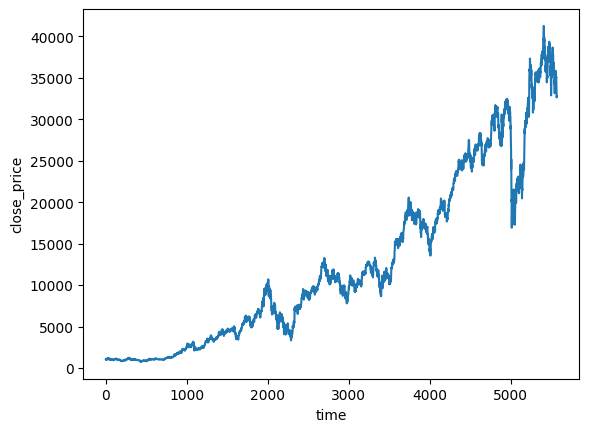

In [ ]:
figure, ax =plt.subplots(1,1)
bank.close.plot(ax=ax)
ax.set_xlabel("time")
ax.set_ylabel("close_price")

market analysis of bear bull or tie with respect to the weekdays

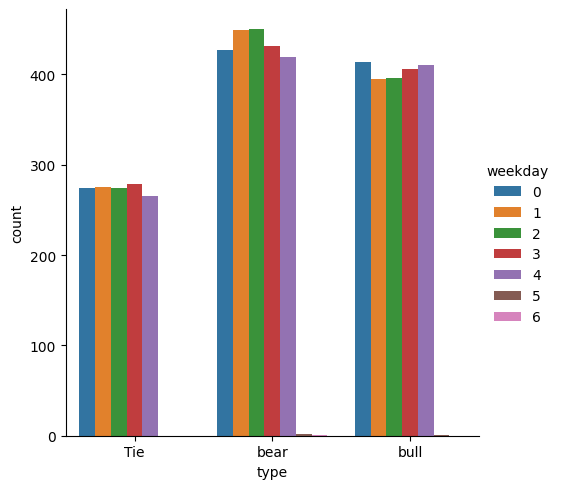

In [ ]:
sns.catplot(x = "type", hue = "weekday", kind = "count", data= bank)

Market moving for more than 500 points in a day

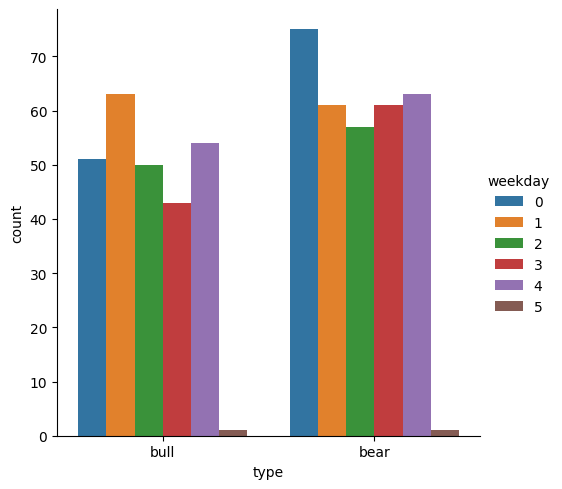

In [ ]:
sns.catplot(x = "type", hue = "weekday",kind = "count", data = bank[bank.range_HL>500])

Market moving for mor than 1000 points in a day

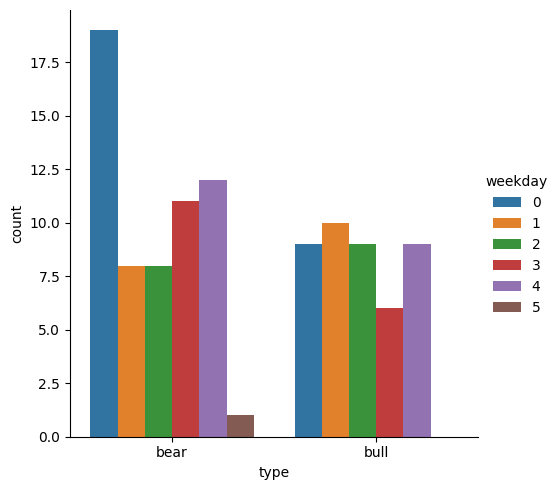

In [ ]:
sns.catplot(x = "type", hue = "weekday",kind = "count", data = bank[bank.range_HL>1000])

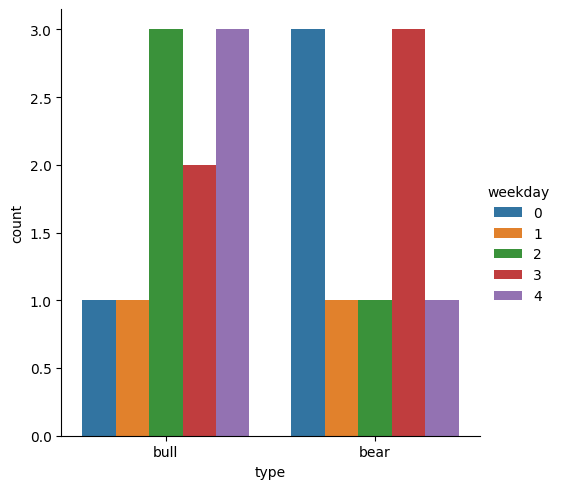

In [ ]:
sns.catplot(x = "type", hue = "weekday",kind = "count", data = bank[bank.range_HL>1500])

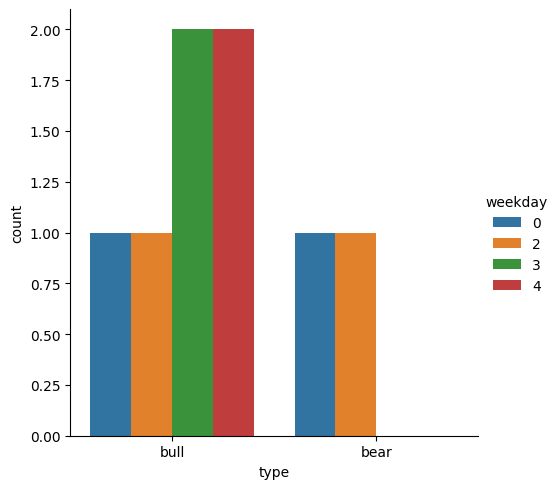

In [ ]:
sns.catplot(x = "type", hue = "weekday",kind = "count", data = bank[bank.range_HL>2000])

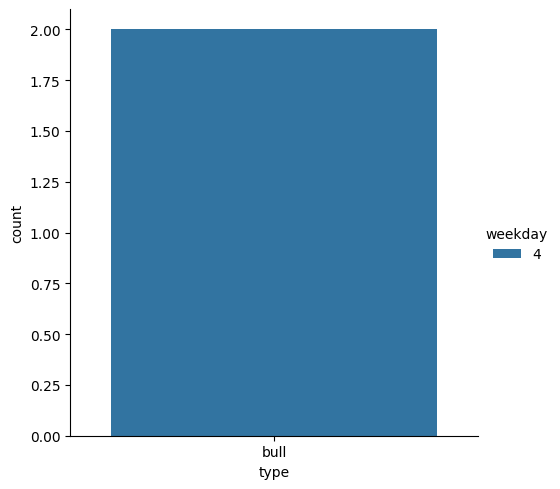

In [ ]:
sns.catplot(x = "type", hue = "weekday",kind = "count", data = bank[bank.range_HL>2500])

([<matplotlib.patches.Wedge at 0x7f815eb6e4c0>,
 [Text(0.7888174477275866, 0.7666596599277521, 'tie'),
  Text(-1.0255347438082267, 0.3978422919225595, 'bear'),
  Text(0.4581363740354253, -1.0000555298510543, 'bull')],
 [Text(0.4302640623968653, 0.4181779963242284, '25%'),
  Text(-0.55938258753176, 0.21700488650321423, '39%'),
  Text(0.2498925676556865, -0.5454848344642114, '36%')])

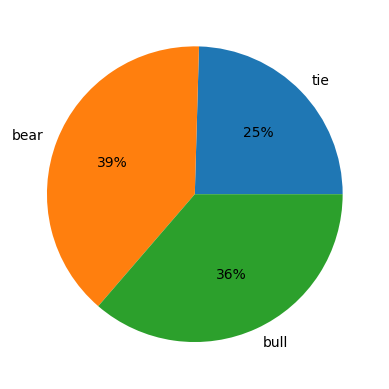

In [ ]:
figure, ax = plt.subplots(1,1)
Bull = len(bank[bank.type=="bull"])
bear = len(bank[bank.type=="bear"])
tie = len(bank[bank.type=="Tie"])

ax.pie([tie,bear,Bull],labels = ["tie","bear", "bull"],autopct="%1.0f%%")

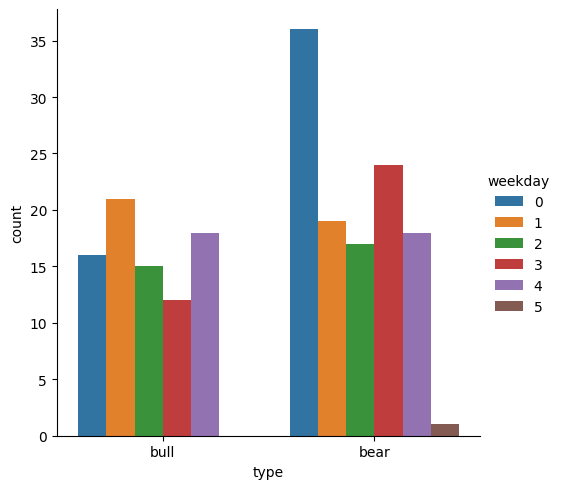

In [ ]:
sns.catplot(x = "type", hue = "weekday",kind = "count", data = bank[bank.range_OC>500])

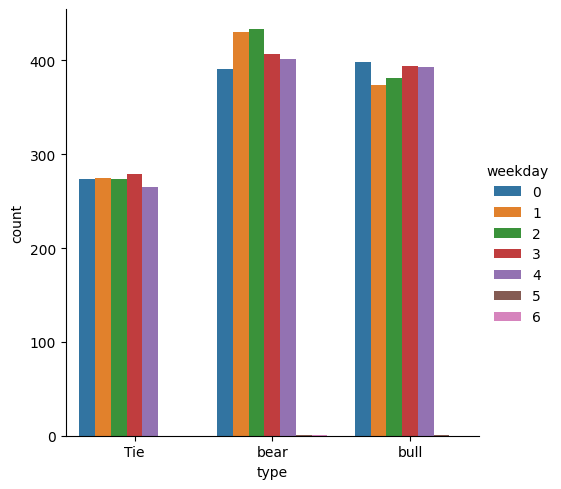

In [ ]:
sns.catplot(x = "type", hue = "weekday",kind = "count", data = bank[bank.range_OC<500])

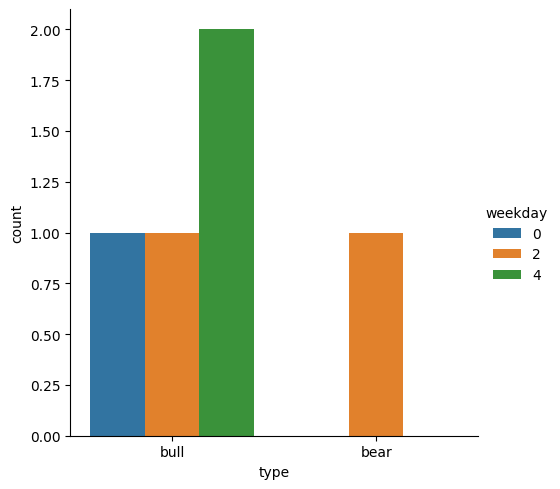

In [ ]:
sns.catplot(x = "type", hue = "weekday",kind = "count", data = bank[bank.range_OC>1500])